This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_16962/1429530752.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://cad-polito-it.github.io/byron/paranoia for details]
  import byron


Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

# Local References

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))

Local references are inside the same macro bunch.

In [3]:
local_ref = byron.f.local_reference(backward=True, loop=False, forward=True)
local_ref

LocalReference[<≠>]

In [4]:
macro_jmp = byron.f.macro('jmp {target}', target=local_ref)
bunch = byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=10)

; 🖋 n1 ➜ Frame❬MacroArray#1❭
foo #2c83  ; 🖋 n1.n2 ➜ Macro❬User#1❭
jmp n9  ; 🖋 n1.n3 ➜ Macro❬User#3❭
bar -9.364e-01  ; 🖋 n1.n4 ➜ Macro❬User#2❭
n5:
foo #2ff8  ; 🖋 n1.n5 ➜ Macro❬User#1❭
foo #6ff1  ; 🖋 n1.n6 ➜ Macro❬User#1❭
foo #771f  ; 🖋 n1.n7 ➜ Macro❬User#1❭
jmp n11  ; 🖋 n1.n8 ➜ Macro❬User#3❭
n9:
foo #0d96  ; 🖋 n1.n9 ➜ Macro❬User#1❭
jmp n11  ; 🖋 n1.n10 ➜ Macro❬User#3❭
n11:
jmp n5  ; 🖋 n1.n11 ➜ Macro❬User#3❭



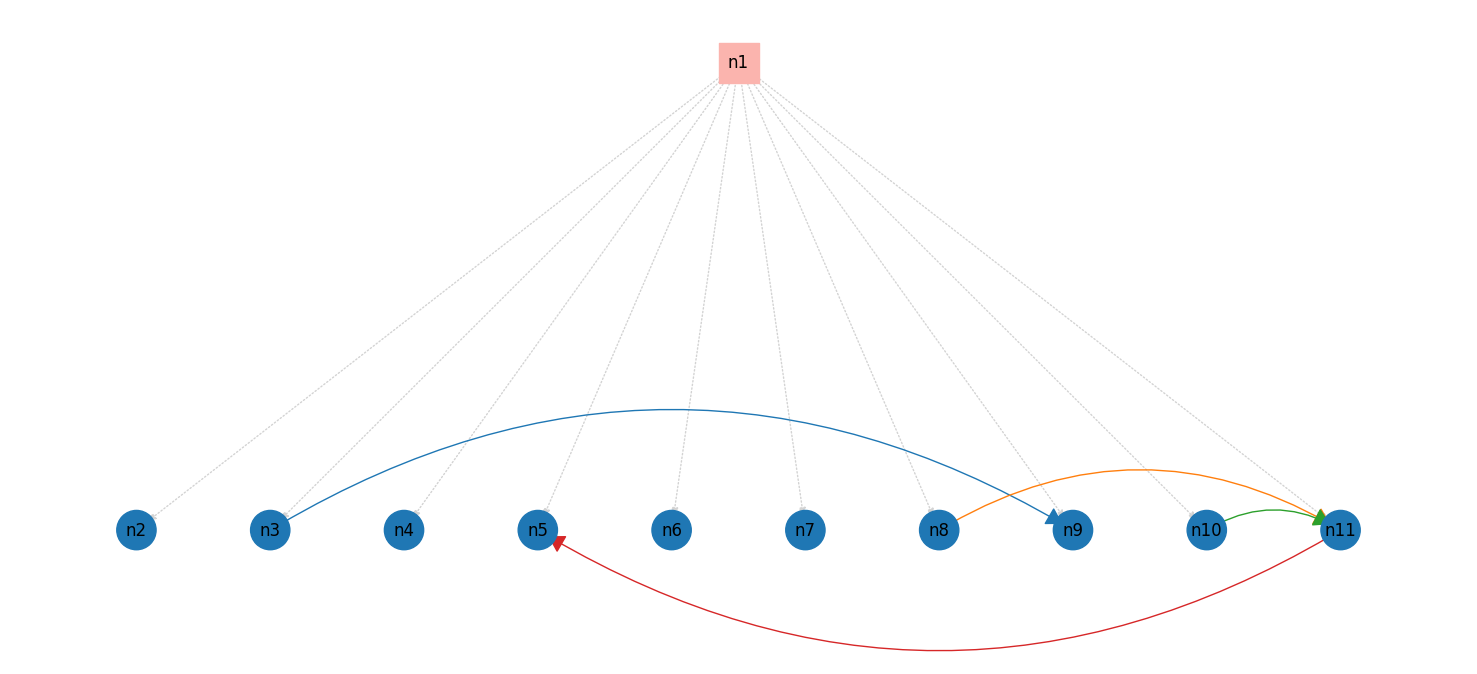

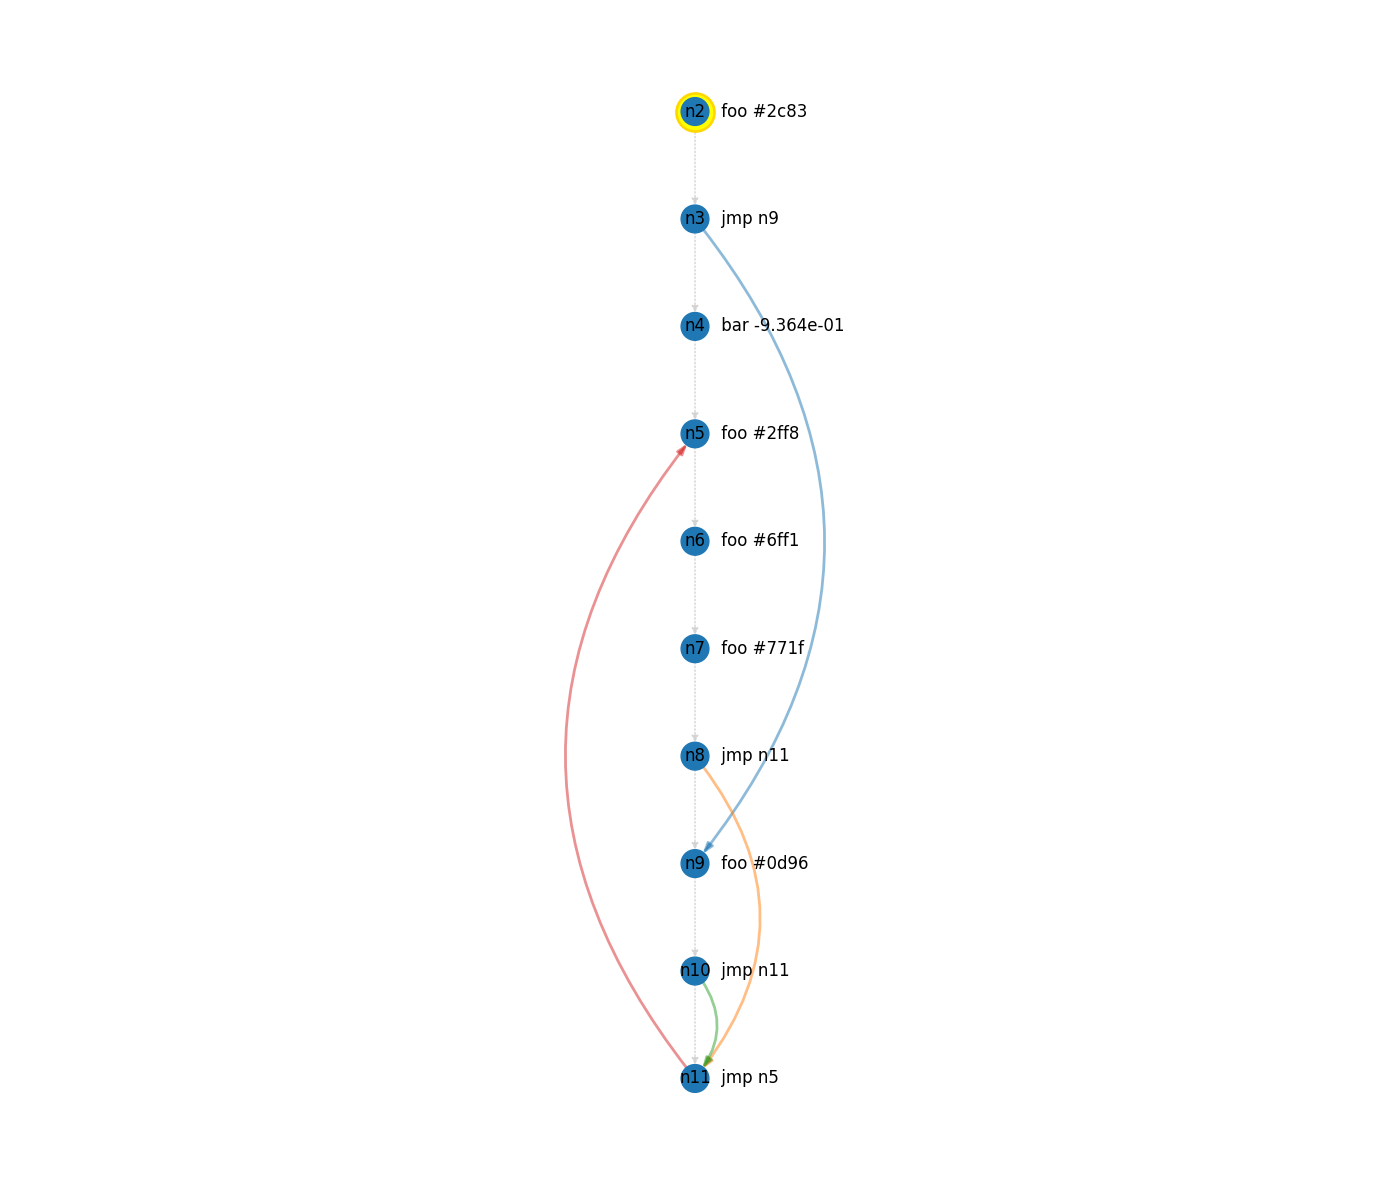

In [5]:
byron.f.as_text(bunch)
byron.f.as_forest(bunch)
byron.f.as_lgp(bunch)

## Label format

By default, if a node is the target of a reference, the `_label` is printed pefore it. The default is `{_node}:\n`, but it may be tweaked in different ways.

In [6]:
byron.f.as_text(byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=5))

; 🖋 n56 ➜ Frame❬MacroArray#2❭
n57:
foo #4771  ; 🖋 n56.n57 ➜ Macro❬User#1❭
jmp n57  ; 🖋 n56.n58 ➜ Macro❬User#3❭
bar +3.534e-01  ; 🖋 n56.n59 ➜ Macro❬User#2❭
foo #2c83  ; 🖋 n56.n60 ➜ Macro❬User#1❭
foo #d806  ; 🖋 n56.n61 ➜ Macro❬User#1❭



In [7]:
byron.f.as_text(byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=5, extra_parameters={'_label': '<<{_node}>> '}))

; 🖋 n62 ➜ Frame❬MacroArray#3❭
<<n63>> foo #4771  ; 🖋 n62.n63 ➜ Macro❬User#1❭
jmp n63  ; 🖋 n62.n64 ➜ Macro❬User#3❭
bar +3.534e-01  ; 🖋 n62.n65 ➜ Macro❬User#2❭
foo #2c83  ; 🖋 n62.n66 ➜ Macro❬User#1❭
foo #d806  ; 🖋 n62.n67 ➜ Macro❬User#1❭



The extra parameters defined in a frame are valid for all successor frames in the syntactic tree

; 🖋 n68 ➜ Frame❬FrameSequence#3❭
; 🖋 n68.n69 ➜ Frame❬FrameSequence#2❭
; 🖋 n68.n69.n70 ➜ Frame❬FrameSequence#1❭
n71:
loop n71  ; 🖋 n68.n69.n70.n71 ➜ Macro❬User#4❭
n72:
loop n72  ; 🖋 n68.n69.n70.n72 ➜ Macro❬User#4❭
n73:
loop n73  ; 🖋 n68.n69.n70.n73 ➜ Macro❬User#4❭
; 🖋 n68.n69.n74 ➜ Frame❬FrameSequence#1❭
n75:
loop n75  ; 🖋 n68.n69.n74.n75 ➜ Macro❬User#4❭
n76:
loop n76  ; 🖋 n68.n69.n74.n76 ➜ Macro❬User#4❭
n77:
loop n77  ; 🖋 n68.n69.n74.n77 ➜ Macro❬User#4❭
; =====================  ; 🖋 n68.n78 ➜ Macro❬Text#1❭
; 🖋 n68.n79 ➜ Frame❬SingleFrame#1❭
; 🖋 n68.n79.n80 ➜ Frame❬FrameSequence#2❭
; 🖋 n68.n79.n80.n81 ➜ Frame❬FrameSequence#1❭
<<<<n82>>>:
loop n82  ; 🖋 n68.n79.n80.n81.n82 ➜ Macro❬User#4❭
<<<<n83>>>:
loop n83  ; 🖋 n68.n79.n80.n81.n83 ➜ Macro❬User#4❭
<<<<n84>>>:
loop n84  ; 🖋 n68.n79.n80.n81.n84 ➜ Macro❬User#4❭
; 🖋 n68.n79.n80.n85 ➜ Frame❬FrameSequence#1❭
<<<<n86>>>:
loop n86  ; 🖋 n68.n79.n80.n85.n86 ➜ Macro❬User#4❭
<<<<n87>>>:
loop n87  ; 🖋 n68.n79.n80.n85.n87 ➜ Macro❬User#4❭
<<<<n88>>>:
l

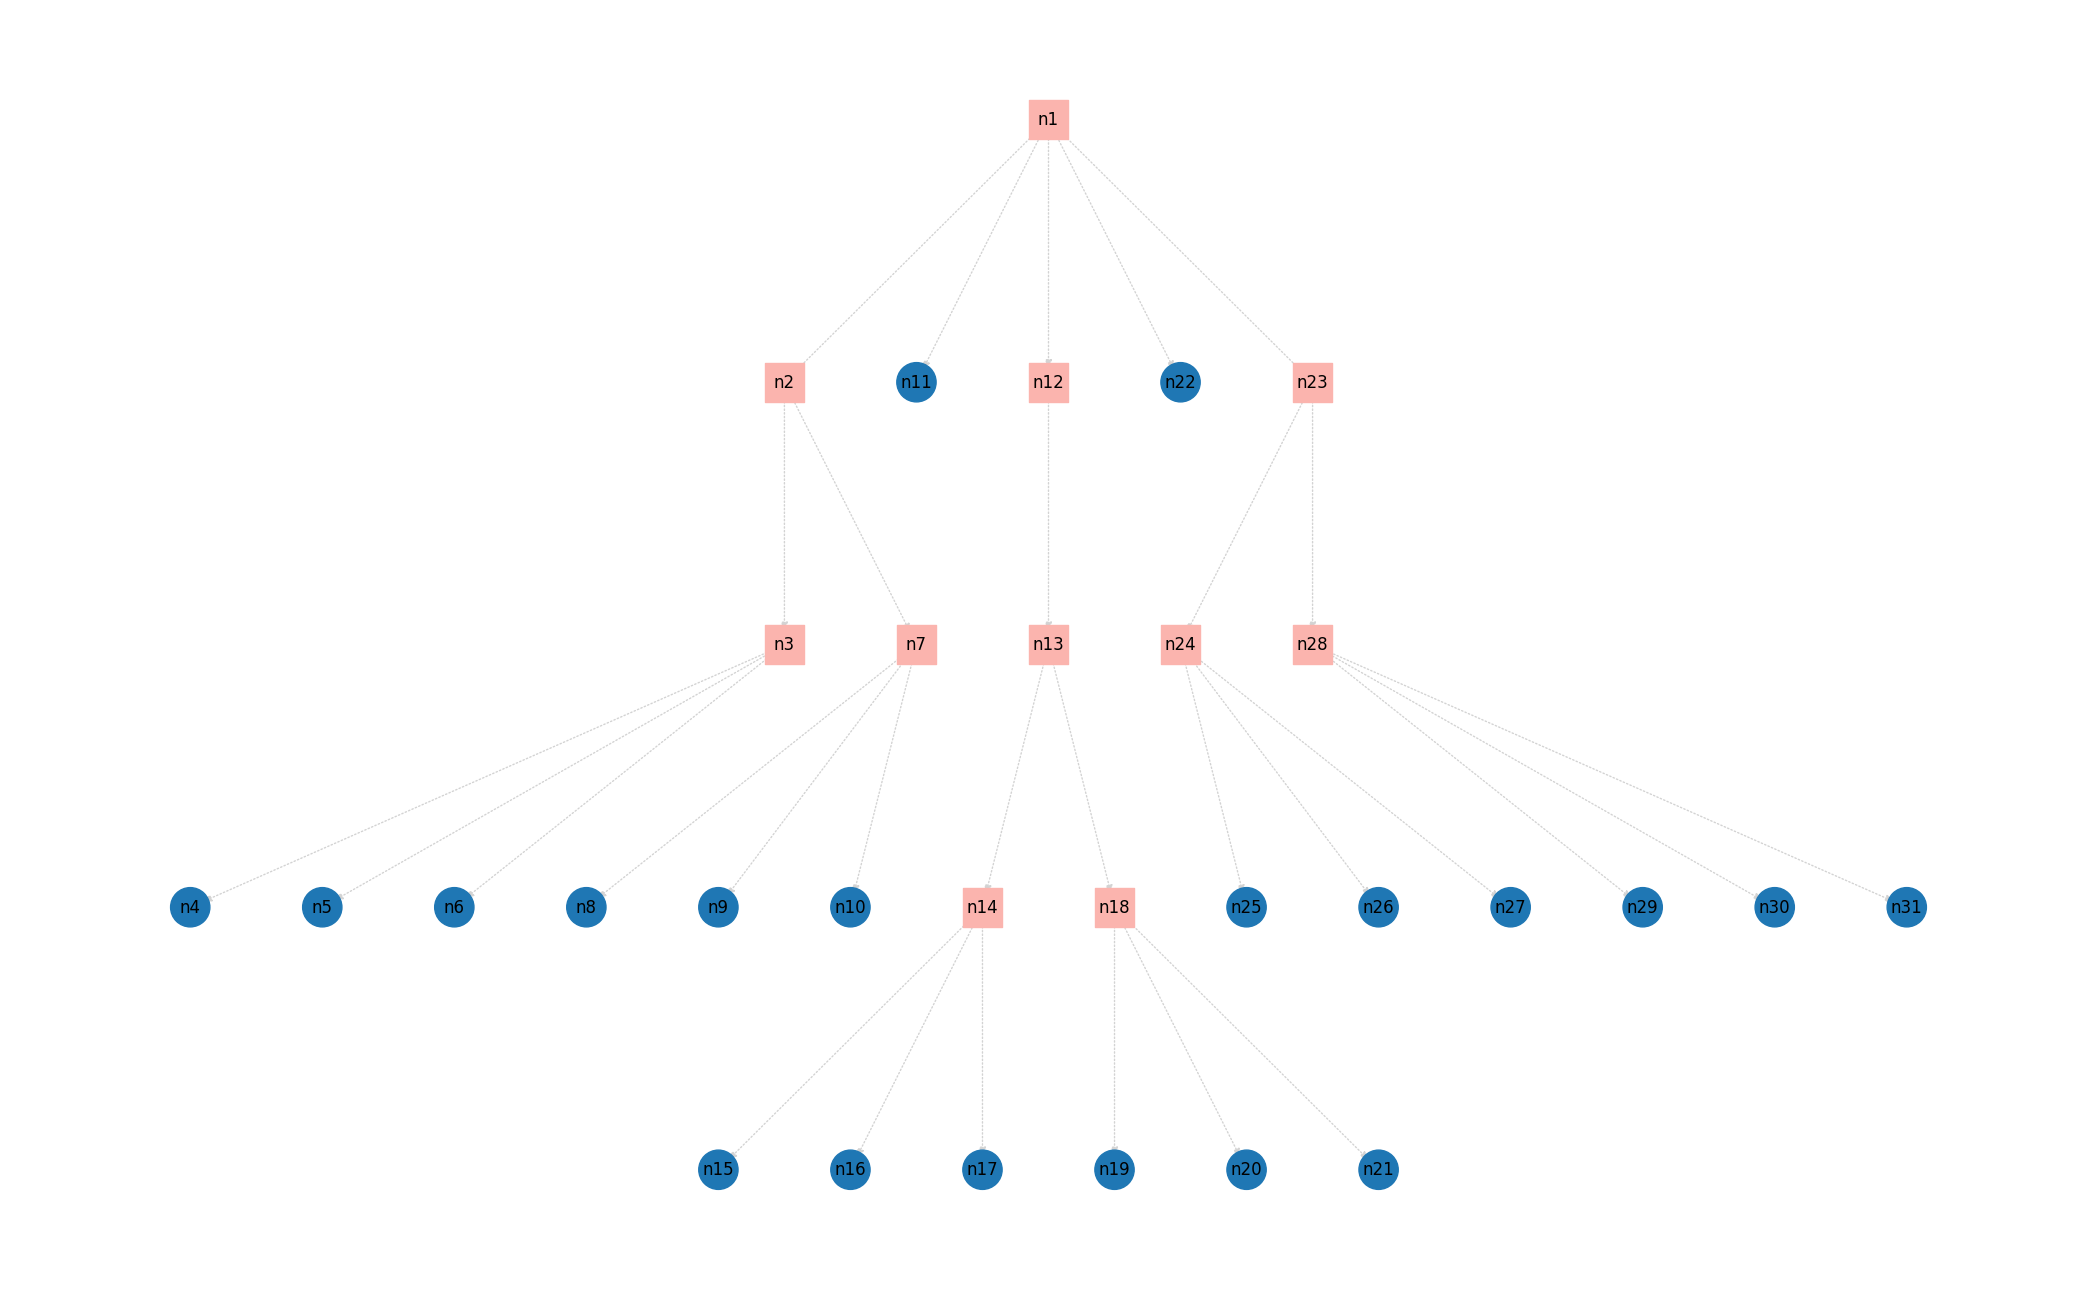

In [8]:
loop = byron.f.macro('loop {me}', me=byron.f.local_reference(backward=False, forward=False))
seq1 = byron.f.sequence([loop, loop, loop])
seq2 = byron.f.sequence([seq1, seq1])
custom = byron.f.sequence([seq2], extra_parameters={'_label': '<<<<{_node}>>>:\n'})
seq3 = byron.f.sequence([seq2, '; =====================', custom, '; =====================', seq2])
byron.f.as_text(seq3)
byron.f.as_forest(seq3)